In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [2]:
IMG_DIMENSION = 128
EPOCHS = 10
CONV_SIZE = 32
BATCH_SIZE = 64
DENSE_SIZE = 512

In [3]:
train_directory = "/home/deepanshu/Desktop/env_legs_images/train/"
test_directory = "/home/deepanshu/Desktop/env_legs_images/validation/"

In [4]:
train_enviornment_dir = "/home/deepanshu/Desktop/env_legs_images/train/env/"
train_leg_dir = "/home/deepanshu/Desktop/env_legs_images/train/leg/"

In [5]:
test_enviornment_dir = "/home/deepanshu/Desktop/env_legs_images/validation/env/"
test_leg_dir = "/home/deepanshu/Desktop/env_legs_images/validation/leg/"

In [6]:
tr_enviornment_fnames = os.listdir(train_enviornment_dir)
tst_enviornment_fnames = os.listdir(test_enviornment_dir)
tr_leg_fmanes = os.listdir(train_leg_dir)
tst_leg_fnames = os.listdir(test_leg_dir)

FileNotFoundError: [Errno 2] No such file or directory: '/home/deepanshu/Desktop/env_legs_images/train/env/'

In [ ]:
print(f"Len of Training Examples of enviornment: {len(tr_enviornment_fnames)}")
print(f"Len of Testing Examples of enviornment: {len(tst_enviornment_fnames)}\n")

print(f"Len of Training Examples of leg: {len(tr_leg_fmanes)}")
print(f"Len of Testing Examples of leg: {len(tst_leg_fnames)}")

In [ ]:
sample_enviornment = mpimg.imread(train_enviornment_dir + tr_enviornment_fnames[0])
sample_leg = mpimg.imread(train_leg_dir + tr_leg_fmanes[0])

In [ ]:
plt.imshow(sample_enviornment)

In [ ]:
plt.imshow(sample_leg)

In [7]:
train_data_param = image.ImageDataGenerator(rescale = 1 / 255)
test_data_param = image.ImageDataGenerator(rescale = 1 / 255)

train_dataset = train_data_param.flow_from_directory(
    train_directory,
    batch_size = BATCH_SIZE,
    class_mode = "binary",
    target_size = (IMG_DIMENSION, IMG_DIMENSION)
)

test_dataset = test_data_param.flow_from_directory(
    test_directory,
    batch_size = BATCH_SIZE,
    class_mode = "binary",
    target_size = (IMG_DIMENSION, IMG_DIMENSION)
)

print(train_dataset.class_indices)

Found 2500 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
{'enviornment': 0, 'leg': 1}


In [8]:
model = keras.Sequential([
    keras.layers.Conv2D(CONV_SIZE, (3, 3), activation = "relu", input_shape = (IMG_DIMENSION, IMG_DIMENSION, 3)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(CONV_SIZE, (3, 3), activation = "relu"),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(CONV_SIZE, (3, 3), activation = "relu"),
    keras.layers.MaxPooling2D(2, 2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(DENSE_SIZE, activation = "relu"),
    keras.layers.Dense(1, activation = "sigmoid")
])

model.compile(optimizer=keras.optimizers.RMSprop(), loss="binary_crossentropy", metrics=["accuracy"])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

In [10]:
save_best = keras.callbacks.ModelCheckpoint(filepath = "leg_classifier_raspi_v2.h5", 
                                           monitor = "val_accuracy",
                                           mode = "max",
                                           save_best_only = True)

history = model.fit(train_dataset, validation_data = test_dataset, epochs = EPOCHS, callbacks = [save_best])

Epoch 1/10
40/40 [==============================] - 2109s 53s/step - loss: 0.6786 - accuracy: 0.7084 - val_loss: 0.3763 - val_accuracy: 0.8550
Epoch 2/10
40/40 [==============================] - 2047s 51s/step - loss: 0.3778 - accuracy: 0.8360 - val_loss: 0.2428 - val_accuracy: 0.9075
Epoch 3/10
40/40 [==============================] - 2042s 51s/step - loss: 0.2834 - accuracy: 0.8952 - val_loss: 0.1985 - val_accuracy: 0.9300
Epoch 4/10
40/40 [==============================] - 2033s 51s/step - loss: 0.1567 - accuracy: 0.9412 - val_loss: 0.1781 - val_accuracy: 0.9300
Epoch 5/10
40/40 [==============================] - 2104s 53s/step - loss: 0.1117 - accuracy: 0.9624 - val_loss: 0.1040 - val_accuracy: 0.9600
Epoch 6/10
40/40 [==============================] - 2145s 54s/step - loss: 0.0876 - accuracy: 0.9696 - val_loss: 0.0949 - val_accuracy: 0.9700
Epoch 7/10
40/40 [==============================] - 2330s 58s/step - loss: 0.0723 - accuracy: 0.9800 - val_loss: 0.0973 - val_accuracy: 0.9725

In [20]:
import joblib
joblib.dump(train_dataset.class_indices, "classes_230.pkl")

['classes_230.pkl']

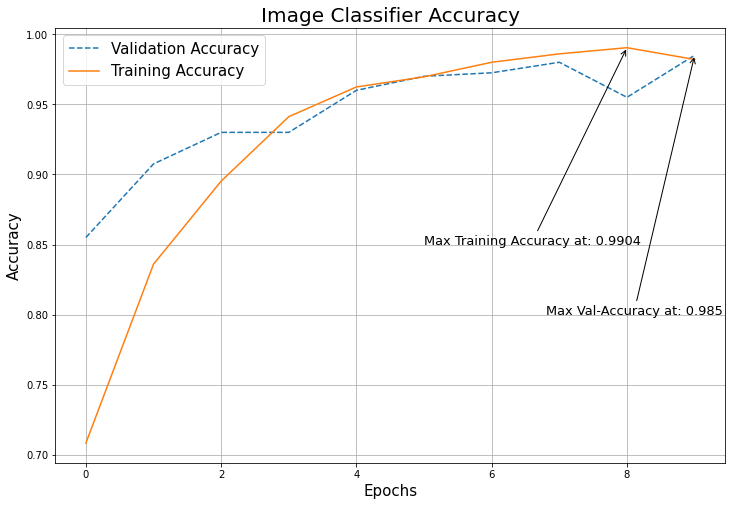

In [31]:
plt.figure(figsize=(12, 8))
plt.plot(history.epoch, history.history['val_accuracy'], label = "Validation Accuracy", linestyle = '--')
plt.plot(history.epoch, history.history['accuracy'], label = "Training Accuracy")
plt.grid()
plt.annotate(f"Max Training Accuracy at: {round(max(history.history['accuracy']), 4)}", xy=(history.epoch[history.history['accuracy'].index(max(history.history['accuracy']))], max(history.history['accuracy'])), 
            xytext=(5.0, 0.85), arrowprops=dict(arrowstyle='->'), fontsize=13)
plt.annotate(f"Max Val-Accuracy at: {round(max(history.history['val_accuracy']), 4)}", xy=(history.epoch[history.history['val_accuracy'].index(max(history.history['val_accuracy']))], max(history.history['val_accuracy'])), 
            xytext=(6.8, 0.8), arrowprops=dict(arrowstyle='->'), fontsize=13)
plt.legend(fontsize=15)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.title('Image Classifier Accuracy', fontsize=20)
plt.savefig('phone_img_clf_acc.jpg')

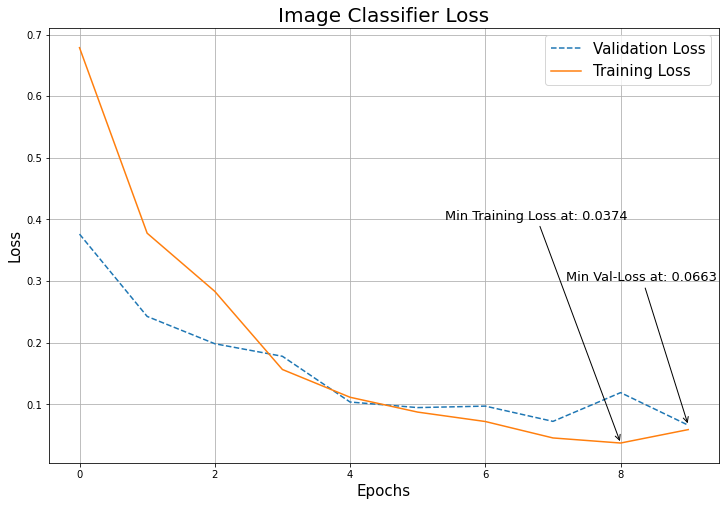

In [37]:
plt.figure(figsize=(12, 8))
plt.plot(history.epoch, history.history['val_loss'], label = "Validation Loss", linestyle = '--')
plt.plot(history.epoch, history.history['loss'], label = "Training Loss")
plt.grid()
plt.annotate(f"Min Training Loss at: {round(min(history.history['loss']), 4)}", xy=(history.epoch[history.history['loss'].index(min(history.history['loss']))], min(history.history['loss'])), 
            xytext=(5.4, 0.4), arrowprops=dict(arrowstyle='->'), fontsize=13)
plt.annotate(f"Min Val-Loss at: {round(min(history.history['val_loss']), 4)}", xy=(history.epoch[history.history['val_loss'].index(min(history.history['val_loss']))], min(history.history['val_loss'])), 
            xytext=(7.2, 0.3), arrowprops=dict(arrowstyle='->'), fontsize=13)
plt.legend(fontsize=15)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.title('Image Classifier Loss', fontsize=20)
plt.savefig('phone_img_clf_loss.jpg')

In [1]:
#Model Evaluation

## TESTING PHASE

In [19]:
from PIL import Image

img = Image.open("/home/deepanshu/Desktop/env_leg_raspi_images/test/leg/4801.jpg").resize((128, 128))
np.asarray(img, dtype = np.float)

array([[[254., 255., 253.],
        [254., 255., 253.],
        [254., 255., 253.],
        ...,
        [178., 172., 162.],
        [178., 169., 160.],
        [175., 166., 156.]],

       [[254., 255., 253.],
        [254., 255., 253.],
        [254., 255., 253.],
        ...,
        [179., 173., 162.],
        [179., 172., 161.],
        [176., 168., 157.]],

       [[254., 255., 253.],
        [254., 255., 253.],
        [254., 255., 253.],
        ...,
        [180., 173., 163.],
        [180., 171., 162.],
        [178., 168., 160.]],

       ...,

       [[108., 101.,  99.],
        [104.,  98.,  96.],
        [106., 102.,  99.],
        ...,
        [102.,  96.,  95.],
        [102.,  97.,  94.],
        [101.,  95.,  93.]],

       [[108., 100.,  99.],
        [107., 101.,  99.],
        [104.,  99.,  97.],
        ...,
        [102.,  97.,  95.],
        [102.,  97.,  96.],
        [100.,  94.,  93.]],

       [[104., 101., 100.],
        [108., 105., 101.],
        [104., 1

In [16]:
from tensorflow.keras.models import load_model
import joblib
trained_model = load_model('leg_classifier_raspi.h5')
classes = joblib.load("classes_230.pkl")

In [17]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [6]:
#Model Conversion
trained_model = load_model('leg_classifier_230.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(trained_model)

tflite_model = converter.convert()
open('leg_clf.tflite', 'wb').write(tflite_model)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /tmp/tmppyns5ip0/assets


12930532

<class 'numpy.float32'>
Legs Detected


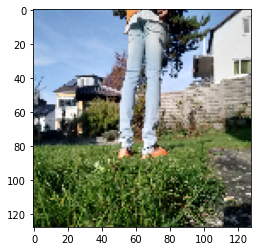

In [9]:
test_image = image.load_img("/home/deepanshu/Desktop/env_legs_images/validation/leg/15.jpg", target_size = (IMG_DIMENSION, IMG_DIMENSION))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
print(type(test_image[0][0][0]))

test_image = np.expand_dims(test_image, axis = 0)

result = trained_model.predict(test_image)[0][0]
print("No Leg Detected" if result == classes['enviornment'] else "Legs Detected")